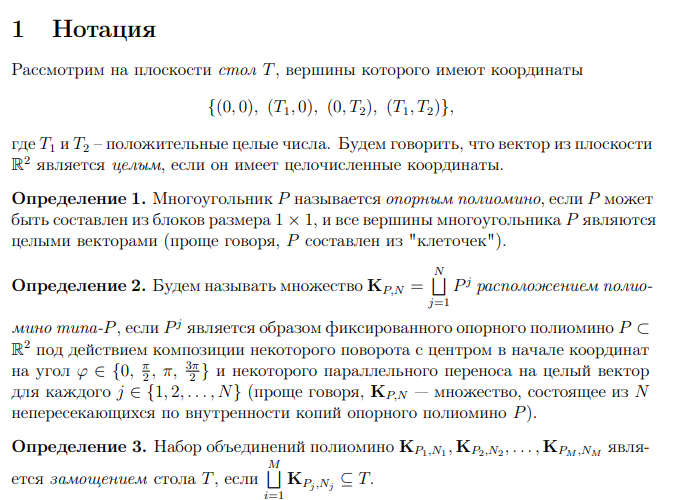

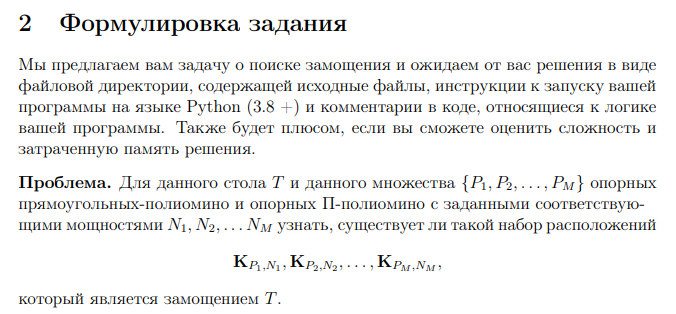

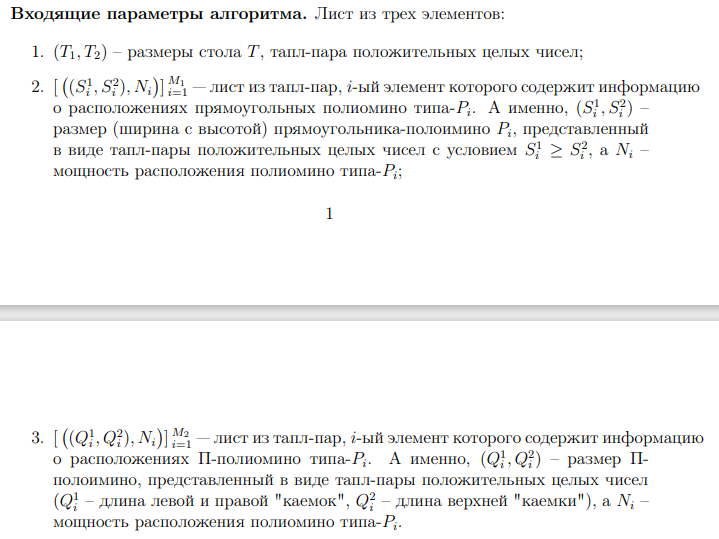

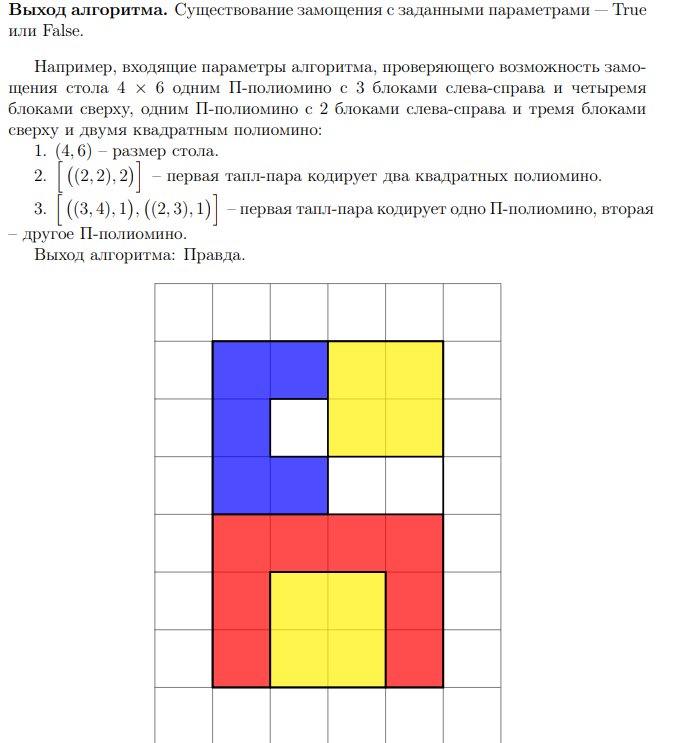

In [1]:
def poliomin(params):
    
# парметры размерности стола, полиминов и их колличества
    T = params[0]
    T1 = T[0]
    T2 = T[1]
    S = params[1]
    Q = params[2]
    
# эта функция создает матрицу с нулями размерности T1*T2, которая представляет стол для замощения 
    def matrix(T1=T1,T2=T2):
        m= [[0] * T1 for i in range(T2)]
        return m
    
# эта функция возвращает прямоуголтный полиомин или перевернутый прямоугольный полиомин, или оба
    def pryam(S):
        m=matrix()
        mn=[]
        try:
            for i in range(S[1]):
                for i2 in range(S[0]):
                    m[i][i2] =  1
            mn.append(m)
            m=matrix()
        except:
            pass
        m = matrix()
        try:
            for i in range(S[0]):
                for i2 in range(S[1]):
                    m[i][i2] =  1
            mn.append(m)
            m = matrix()
        except:
            pass
        return mn
    
# эта функция возвращает все возможные положения П-полиомина в верхнем левом углу матрицы
    def ppol(Q):
        m = matrix()
        mn = []
        try:
            for i in range(Q[0]):
                for i1 in range(Q[1]):
                    m[i][i1] = 1
                    if i > 0 and i1 >0 and i1<Q[1]-1:
                        m[i][i1] = 0
            mn.append(m)
            m =matrix()
        except:
            pass
        m=matrix()
        try:
            for i in range(Q[0]):
                for i1 in range(Q[1]):
                    m[i][i1] = 1
                    if i< Q[0]-1 and i1>0 and i1<Q[1]-1:
                        m[i][i1]=0
            mn.append(m)
            m =matrix()
        except:
            pass
        m=matrix()
        try:
            for i in range(Q[1]):
                for i1 in range(Q[0]):
                    m[i][i1] = 1
                    if i > 0 and i1 > 0 and  i < Q[1]-1:
                        m[i][i1]=0
            mn.append(m)
            m=matrix()
        except:
            pass
        m=matrix()
        try:
            for i in range(Q[1]):
                for i1 in range(Q[0]):
                    m[i][i1] = 1
                    if i1 < Q[0] -1 and i>0 and i<Q[1]-1:
                        m[i][i1]=0
            mn.append(m)
            m=matrix()
        except:
            pass
        
        return mn
    
# эта функция считывает координаты всех возможных полиоминов, которые представлены в виде единиц в матрице
    def coord(m,T1=T1,T2=T2):
        c = []
        for i in range(T2):
            for i2 in range(T1):
                if m[i][i2] == 1:
                    c.append([i,i2])
        return c
# эта функция двигает полиомин вправо
    def right(m):
        m1 = matrix()
        c = coord(m)
        for i in range(len(c)):
            m1[c[i][0]][c[i][1]+1]=1
        return m1
# эта функция двигает полиомин вниз
    def down(m):
        m1 = matrix()
        c = coord(m)
        for i in range(len(c)):
            m1[c[i][0]+1][c[i][1]]=1
        return m1
# эта функция двигает полиомин вверх
    def up(m):
        m1 = matrix()
        c = coord(m)
        for i in range(len(c)):
            m1[c[i][0]-1][c[i][1]]=1
        return m1
# эта функция все возможные положения полиомина в матрице
# изначально каждый полиомин находится в верхнем левом углу матрицы
    def all_pos(m,T1=T1,T2=T2):
        mn = []
        mn.append(m)
        for i in range(T1 - coord(m)[-1][1]):
            for i1 in range(T2 - 1-coord(m)[-1][0]):
                m = down(m)
                mn.append(m)
            if T1 - coord(m)[-1][1] > 1:
                m = right(m)
                while coord(m)[0][0] >0:
                    m = up(m)
                mn.append(m)
        return mn
    
# эта функция удвляет возможные дубликаты
    def delete_double(m):
        m_new = []
        [m_new.append(i) for i in m if i not in m_new]
        return m_new
    
# эта функция суммирует поэлементно две матрицы, показывая где будут находится два полиомина каждый в одном положении
    def summ(m1,m2):
        result = [[m1[i][j] + m2[i][j]  for j in range(len(m1[0]))] for i in range(len(m1))] 
        return result
    
# эта функция проверяет возможно ли замощение при различных положениях полиоминов путем их сложения:
# если хотя бы в одной их всех возможных комбинаций полиминов, хотя бы в одной нету
# элемента больше 1(это означает что они не персеклись), значит что замощение возможно
    def prov(mn1,mn2):
        mn=[]
        for i in range(len(mn1)):
            for j in range(len(mn2)):
                x = summ(mn1[i],mn2[j])
                s=0
                for k in range(len(x)):
                    for k1 in range(len(x[k])):
                        if x[k][k1] > 1:
                            s  = s + 1
                if s == 0:
                    mn.append(summ(mn1[i],mn2[j]))         
        return mn
    
# эта функция находит все возможные комбинации из указанных прямоуглоьных полиоминов и их колличества 
    def final(S=S):
        all_S = []
        for i in range(len(S)):
            for i2 in range(S[i][1]):
                all_S.append(S[i][0])
        Sx=[]
        test = pryam(all_S[0])
        for i in range(len(test)):
            Sx = Sx + all_pos(test[i])
        if len(all_S) >1:
            del Sx[:]
            test1 = pryam(all_S[1])
            Sn=[]
            for i in range(len(test1)):
                for i1 in range(len(test)):
                    Sn = Sn + prov(all_pos(test1[i]),all_pos(test[i1]))
            Sn = delete_double(Sn)
            if len(all_S) > 2:
                del Sx[:]
                for i in range(len(all_S)):
                    if i>1:
                        x=[]
                        for j in range(len((pryam(all_S[i])))):
                            x.append(all_pos((pryam(all_S[i]))[j]))
                        for y in range(len(Sn)):
                            for y2 in range(len(x)):
                                for k in range(len(prov([Sn[i]],x[y2]))):
                                    if len(prov([Sn[i]],x[y2])[k]) > 0:
                                        Sx.append(prov([Sn[i]],x[y2])[k])
            else: Sx = Sn
        Sx = delete_double(Sx)
        return Sx
    
# эта функция находит все возможные комбинации из указанных П-полиоминов и их колличества
    def final1(Q=Q):
        all_Q = []
        for i in range(len(Q)):
            for i2 in range(Q[i][1]):
                all_Q.append(Q[i][0])
        Qx=[]
        test = ppol(all_Q[0])
        for i in range(len(test)):
            Qx = Qx + all_pos(test[i])
        if len(all_Q) >1:
            del Qx[:]
            test1 = ppol(all_Q[1])
            Qn=[]
            for i in range(len(test1)):
                for i1 in range(len(test)):
                    Qn = Qn + prov(all_pos(test1[i]),all_pos(test[i1]))
            Qn = delete_double(Qn)
            if len(all_Q) >2:
                del Qx[:]
                for i in range(len(all_Q)):
                    if i>1:
                        x=[]
                        for j in range(len((ppol(all_Q[i])))):
                            x.append(all_pos((ppol(all_Q[i]))[j]))
                        for y in range(len(Qn)):
                            for y2 in range(len(x)):
                                for k in range(len(prov([Qn[i]],x[y2]))):
                                    if len(prov([Qn[i]],x[y2])[k]) > 0:
                                        Qx.append(prov([Qn[i]],x[y2])[k])
            else: Qx=Qn       
        Qx = delete_double(Qx)
        return Qx

# если существует хотя бы одна комбинация указанных полиоминов, где их сложение не пересекается, то замощение возможно
    if len(final())>0 and len(final1())>0:
        if len(prov(final(),final1()))>0:
            print('Замощение с такими парметрами возможно')
        else:
            print('Замощение с такими параметрами невозможно')
    else:
        print('Замощение с такими параметрами невозможно')
        
# чтобы программа сработала нужно ввести параметры замощения в функцию poliomin
# пример для ввода парметров: [(4,6),[[(2,2),2]],[[(3,4),1],[(2,3),1]]]

poliomin([(4,6),[[(2,2),2]],[[(3,4),1],[(2,3),1]]])

Замощение с такими парметрами возможно
